# FEATURE REDUCED DATA SET: 
### Preprocessing a drastically reduced data set for modeling

## Sections:
- <a href="#overview">1. Overview of Dataset</a><br>
- <a href="#missing">2. Missing Values & Imputation</a><br>
- <a href="#feature">3. Feature Engineering</a><br>
- <a href="#final">4. Minimizing & Finalizing Feature Space</a><br>

### Initializing:

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option("display.max_columns", 101)

- - -
<br>

<p><a name="overview"></a></p>
## 1. Overview of Dataset

### Load Datasets: 

In [2]:
# Load train dataset
df_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train = df_train[df_train['GrLivArea'] < 4500]
df_train.shape
df_test.shape

(1459, 80)

In [4]:
# Check for duplicated values
print('Duplicated train values:', df_train.duplicated().sum())
print('Duplicated test values:', df_test.duplicated().sum())

Duplicated train values: 0
Duplicated test values: 0


### Merge training and test Datasets for Processing:

In [5]:
df_train_id = df_train['Id']
df_test_id = df_test['Id']

In [6]:
# Drop ID Column
df_train = df_train.drop(columns=['Id'])
df_test = df_test.drop(columns=['Id'])

In [7]:
# Create a set variable to differnetiate between train and test
df_train['section'] = "Train"
df_test['section'] = "Test"

In [8]:
# Create a Sale Price column for df_test and set to 0 as a placeholder
df_test['SalePrice'] = 0

In [9]:
# Stack the datasets
df = pd.concat([df_train, df_test], ignore_index=True, axis = 0, sort = False)

- - -
<br>

<p><a name="missing"></a></p>
## 2. Missing Values & Imputation

Text(0.5,1,'Missing Values by Feature')

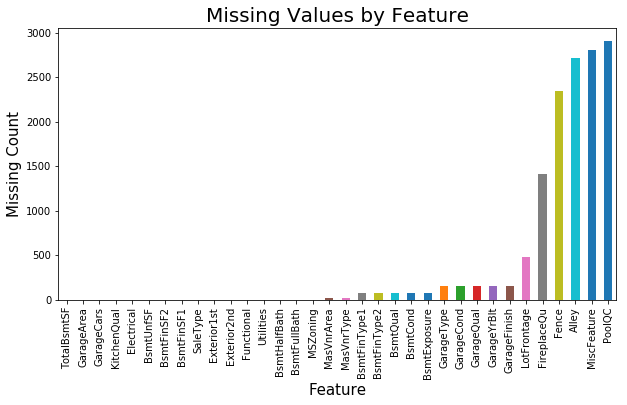

In [10]:
# Check for Columns with NA values
missing = df.isnull().sum()

# Vizualize missing value count
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (10,5))
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Missing Count',fontsize = 15)
plt.title('Missing Values by Feature', fontsize=20)

In [11]:
# Check Number of missing numerically
print(missing)

df[df['PoolArea'] == 0].shape

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
LotFrontage      486
FireplaceQu     1420
Fence           2346
Alley           2719
MiscFeature     2812
PoolQC          2908
dtype: int64


(2905, 81)

### Impute Electrical

In [12]:
# Impute Missing Electrical using Mode
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

### Impute Bsmt Baths

In [13]:
# Imput Mode for Missing Bsmt Bath Data
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])

### Impute for Garage Features for observations that have a garage

In [14]:
# Calcs
fin_mode = df['GarageFinish'].mode()[0]
qual_mode = df['GarageQual'].mode()[0]
cond_mode = df['GarageCond'].mode()[0]

# Impute where Garage Exists

df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mode()[0])

df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mean())

df['GarageFinish']=np.where((df.GarageFinish.isna())&\
                          (df.GarageType.isna()==False),fin_mode,df['GarageFinish'])

df['GarageQual']=np.where((df.GarageQual.isna())&\
                          (df.GarageType.isna()==False),qual_mode,df['GarageQual'])

df['GarageCond']=np.where((df.GarageCond.isna())&\
                          (df.GarageType.isna()==False),cond_mode,df['GarageCond'])

df['GarageYrBlt']=np.where((df.GarageYrBlt.isna())&\
                          (df.GarageType.isna()==False),df['YearBuilt'],df['GarageYrBlt'])

### Impute MasVnrType for Houses with MasVnr

In [15]:
vnr_mode = df['MasVnrType'].mode()[0]

df['MasVnrType']=np.where((df.MasVnrType.isna())&\
                          (df.MasVnrArea.isna()==False),vnr_mode,df['MasVnrType'])

### Impute Basement Variables for houses with a Bsmt

In [16]:
qual_mode = df['BsmtQual'].mode()[0]

df['BsmtQual'] = np.where((df.BsmtQual.isna())&\
                          (df.BsmtFinType1.isna()==False),qual_mode,df['BsmtQual'])

In [17]:
cond_mode = df['BsmtCond'].mode()[0]

df['BsmtCond'] = np.where((df.BsmtCond.isna())&\
                          (df.BsmtFinType1.isna()==False),cond_mode,df['BsmtCond'])

In [18]:
#  Find mode of BsmtExposure
bsmt_exposure_mode = df['BsmtExposure'].mode()[0]

# Fill in for observation with basement
df['BsmtExposure']=np.where((df.BsmtExposure.isna())&(df.BsmtQual.isna()==False),bsmt_exposure_mode,df['BsmtExposure'])

In [19]:
#  Find mode of BsmtFinType2
bsmt2_exposure_mode = df['BsmtFinType2'].mode()[0]

# Fill in for observation with basement
df['BsmtFinType2']=np.where((df.BsmtFinType2.isna())&(df.BsmtQual.isna()==False),bsmt2_exposure_mode,df['BsmtFinType2'])

### Impute PoolQC for houses with a Pool

In [20]:
#Find mode of PoolQC
pool_mode = df['PoolQC'].mode()[0]

# Fill in for observation with basement
df['PoolQC']=np.where((df.PoolQC.isna())&(df.PoolArea > 0),pool_mode,df['PoolQC'])

### Impute none for variables in which NA means None 

In [21]:
# Create List of Columns to impute None for missing
temp = ['PoolQC','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',"MasVnrType",'GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu','Fence','MiscFeature','Alley']

# Impute None
df[temp] = df[temp].fillna('None')

### Impute 0 for MasVnrArea and GarageYrBlt

In [22]:
# Create List of Columns to impute 0 for missing
temp2 = ['MasVnrArea','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

# Impute 0
df[temp2] = df[temp2].fillna(0)

### Impute Mode for LotFrontage by Neighborhood

In [23]:
# Impute Lot Frontage based on mean of neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### Drop Utilities and Street

In [24]:
# Drop Utilities and Street as values are mostly all the same
df = df.drop(columns=['Utilities','Street'])

### Impute for MSzoning

In [25]:
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [26]:
temp = ['Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional']

for col in temp:
    df[col]=df[col].fillna(df[col].mode()[0])

### Check Missingness

In [27]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print('Missing Values:',missing.sum())

Missing Values: 0


- - -
<br>

<p><a name="feature"></a></p>
## 3. Feature Engineering

In [28]:
# Convert MSSubClass to String since it is really categorical
df['MSSubClass'] = df['MSSubClass'].apply(str)

### Ordinal Encoding

In [29]:
ordinal = df[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','ExterQual', 'ExterCond','HeatingQC',\
           'PoolQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'GarageFinish', 'Functional',\
           'Fence','LandSlope','BsmtExposure','LotShape', 'PavedDrive','CentralAir']].copy()

In [30]:
# Create a dictionary of all ordinal values
temp = {}

for col in ordinal:
    temp[col] = ordinal[col].unique().tolist()

In [31]:
# Take a look at Values
temp

{'FireplaceQu': ['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'BsmtQual': ['Gd', 'TA', 'Ex', 'None', 'Fa'],
 'BsmtCond': ['TA', 'Gd', 'None', 'Fa', 'Po'],
 'GarageQual': ['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'],
 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'PoolQC': ['None', 'Ex', 'Fa', 'Gd'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', 'None'],
 'Functional': ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'],
 'Fence': ['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', 'None'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'PavedDrive': ['Y', 'N', 'P'],
 'CentralAir': ['Y', 'N']}

In [32]:
# Create dict based on dict
temp_dict = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5,'Mn': 2, 'Av': 3,'No': 1,\
             'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6,'RFn': 4, 'Fin': 6,\
             'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7,\
             'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4,'Sev': 0, 'Mod': 1, 'Gtl': 2,'Y':1,'N':0,\
             'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}

# Convert Paved Drive on its own
ordinal['PavedDrive'] = ordinal['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0}).astype(int)

# Encode the rest of the columns
for col in ordinal.columns.drop("PavedDrive"):
    ordinal[col] = ordinal[col].map(temp_dict).astype(int)
    

In [33]:
# Replace columns in the train dataset
for col in ordinal.columns:
    df[col]=ordinal[col]

In [34]:
# Checkout remaining Categorical Columns
df.columns[df.dtypes == object]

Index(['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'MiscFeature',
       'SaleType', 'SaleCondition', 'section'],
      dtype='object')

### Numerical Data

In [35]:
# Drop Partial Bsmt SF
df = df.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'])

In [36]:
# Change Pool Area to Yes/No pool
df['PoolArea'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else x)

# Rename Column
df=df.rename(columns = {'PoolArea':'Pool'})

In [37]:
# Create a total porch SF
df['PorchSF'] = df['OpenPorchSF']+df['EnclosedPorch']+\
df['3SsnPorch']+df['ScreenPorch']

In [38]:
# Turn PorchTypes to Binary
temp = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

for col in temp:
    df[col] = df[col].apply(lambda x: 1 if x > 0 else x)

In [39]:
# Check all Numerical not in ordinal
df.loc[:,((df.dtypes == int) | (df.dtypes == float))].columns

Index(['LotFrontage', 'LotShape', 'LandSlope', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence'],
      dtype='object')

In [40]:
# Create a total bath column
df['TotalBath'] = df['BsmtFullBath']+(0.5*df['BsmtHalfBath'])+\
df['FullBath']+(0.5*df['HalfBath'])

In [41]:
# Create a total Square Feet Column
df['TotalSF'] = df['GrLivArea']+df['TotalBsmtSF']

**(Note: Possibly Consider Transforming Features that are Skewed)**

- - -
<br>

<p><a name="final"></a></p>
##  4. Minimizing & Finalizing Feature Space:

In [42]:
# Importing .csv list of original features determined to be kept for analysis (including ones used above to calculate
# new variables - that will be dropped before dummification):
minFeatList = pd.read_csv('./house-prices-advanced-regression-techniques/minvariables.csv', header = None)
minFeatList.columns = ['features']
minFeatList = np.array(minFeatList.features.map(lambda x: x.replace("'","").strip()))

# Pulling out array of original features:
df_train_col = np.array(df_train.columns)
df_col       = np.array(df.columns)

In [43]:
# Generating list of features to be removed from original list of features:
delCol   = [df_train_col[i] for i in range(len(df_train_col)) if df_train_col[i] not in minFeatList]

# Generating final list of features (prior to dummification):
finalCol = [df_col[i] for i in range(len(df_col)) if df_col[i] not in delCol]

In [44]:
df = df[finalCol]
df.shape

(2917, 40)

### Dummify and Re-split Data for Modeling:

In [45]:
# These features have already been used to generate new variables:
df = df.drop(columns = ['GrLivArea','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

# Dummifying the remaining nominal categorical variables: 
df = pd.get_dummies(df,drop_first=True)

# Sanity check:
df.shape

(2917, 90)

In [46]:
# Splitting the combined data set back to their train and test sets: 
train = df[df['section_Train'] == 1].drop(columns=['section_Train'])
test  = df[df['section_Train'] == 0].drop(columns=['section_Train'])

# Sanity check:
train.shape

(1458, 89)

In [47]:
# Sanity check:
test.shape

(1459, 89)

### Define and Prep training  and test sets:

In [48]:
# Creating training feature set and training dependent set:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

In [49]:
# Sanity check:
X.shape

(1458, 88)

In [50]:
# Creating test test by dropping 'placeholder' variable added above:
XPredict = test.drop(columns=['SalePrice'])

# Sanity check:
XPredict.shape

(1459, 88)

### Printing .csv(s) for modeling:

In [53]:
X.to_csv('./data/xtrain_red.csv')
y.to_csv('./data/ytrain_red.csv')
XPredict.to_csv('./data/xtest_red.csv')
df_test_id.to_csv('./data/testID.csv')

- - -
<br>

In [52]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')